# Homework 4

**INSTRUCTIONS - Please read carefully.**

1. Please complete the following data analysis exercises and upload a copy (one per team) of the completed and executed notebook as your homework submission.

2. A blank code cell has been created below each section (subpart) for you to add the relevant code. Add additional code cells as needed to conduct the analysis. Execute all code cells to display the results. All numerical questions should be answered using code. For example, if a count is needed, write code to generate the count. If the task asks for an insight, use the markdown cell below the code cell and output to provide your insights as needed by interpreting the numbers. If insights are not included, you will not receive full credit.

3. Add comments in each cell to explain what the code is meant to achieve. For example,
```
# group data on columns A and B and calculate the average of column C for each group
```


4. You can search for helpful functions and code to achieve specific tasks like "how to search for a value in a list" or "how to group data by multiple columns" but you may not post the specific questions online or otherwise seek someone's help in answering the specific homework questions. Doing so will result in a zero on the assignment and could result in a failing grade in the course.

<HR/>

## <font color = 'green'> Question - NYC Squirrel Census </font>

Yes, there is such a thing! Visit https://www.thesquirrelcensus.com/ for the history of the project. The City of New York makes the [Central Park squirrel census data](https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw/data) available as part of the [NYC Open Data portal](https://data.cityofnewyork.us/). The dataset reports information on 3,023 sightings. Please download the [data description](https://data.cityofnewyork.us/api/views/vfnx-vebw/files/038f2dd2-2eb6-4152-968a-b075705c9986?download=true&filename=User%20Guide%20_%20Central%20Park%20Squirrel%20Census%20Data%20Collection.docx) and the [data set](https://data.cityofnewyork.us/api/views/vfnx-vebw/rows.csv?accessType=DOWNLOAD&bom=true&format=true) and answer the following questions. Note: The downloaded data file is the Squirrel_Data.csv file so you only need to check the data description for this file. 

<HR/>

### <font color="green">A.</font>
##### <font color="green">Read the data into a dataframe (check column names, missing values, data types, etc. to ensure that the data is in a format fit for subsequent analysis. Display the first 5 rows.  Check that the data type conversion was successful using the info() function.</font>

**Note:** The data set has a unique formatting for the date column. I have provided you some helper code to help with converting the date column to a datetime value. This requires (1) importing the datetime package, (2) creating a datetime parser that converts strings into datetimes and, (3) setting the date_parser = mydateparser option in the call to the read function that you code.


In [9]:
# IMPORTANT:
# Set date_parser = mydateparser when reading the data.

# DO NOT DELETE
# -------------------------------------------------------------------------------------------------
#import the datetime package
from datetime import datetime

# create a dateparse that can parse a string that follows the specified format to a datetime value 
mydateparser = lambda x: datetime.strptime(x, "%m%d%Y")
#--------------------------------------------------------------------------------------------------


# Reading data and checking missing values 
data = pd.read_csv("../HW/Squirrel_Data.csv",parse_dates = ['Date'], infer_datetime_format = True, date_parser = mydateparser, na_values = '**')

#checking data types and displaying first 5 rows
print("Checking column names")
print("--------------------------------")
print(data.columns)
print("--------------------------------")
print('Checking data types')
print("--------------------------------")
print(data.dtypes)
print("--------------------------------")
print("Checking if type conversion is successful")
print("--------------------------------")
print(data.info())
print("--------------------------------")
print("Printing first 5 rows")
data.head()


Checking column names
--------------------------------
Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age', 'Primary Fur Color',
       'Highlight Fur Color', 'Combination of Primary and Highlight Color',
       'Color notes', 'Location', 'Above Ground Sighter Measurement',
       'Specific Location', 'Running', 'Chasing', 'Climbing', 'Eating',
       'Foraging', 'Other Activities', 'Kuks', 'Quaas', 'Moans', 'Tail flags',
       'Tail twitches', 'Approaches', 'Indifferent', 'Runs from',
       'Other Interactions', 'Lat/Long'],
      dtype='object')
--------------------------------
Checking data types
--------------------------------
X                                                    float64
Y                                                    float64
Unique Squirrel ID                                    object
Hectare                                               object
Shift                                                 objec

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,2018-10-14,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,2018-10-19,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,2018-10-14,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,2018-10-17,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,2018-10-17,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


<HR/>

### <font color="green">B.</font>
##### <font color="green">Plot the no. of squirrel sightings over time (earliest to the latest date).</font>

<HR/>

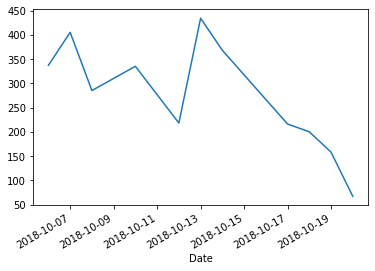

In [10]:
# your code here. 
%matplotlib inline
# import matplotlib.plyplot
import matplotlib.pyplot as plt

new_data = data.groupby('Date')['Hectare Squirrel Number'].count()

new_data.plot();

<HR/>

### <font color="green">C.</font>
##### <font color="green">Does the data set contain multiple sightings of the same squirrel on the same date, shift and hectare?</font>

<HR/>

In [11]:
# your code here.

#grouping by date, shift and hectare
data.groupby('Unique Squirrel ID')[['Date','Shift','Hectare']].count().sort_values(by='Date', ascending=False)

,Date,Shift,Hectare
Unique Squirrel ID,,,
40B-AM-1019-06,2,2,2
4C-PM-1010-05,2,2,2
1F-AM-1010-04,2,2,2
37E-PM-1006-03,2,2,2
7D-PM-1010-01,2,2,2
...,...,...,...
21G-PM-1007-03,1,1,1
21G-PM-1007-04,1,1,1
21H-AM-1017-01,1,1,1


**Answers:** Your answers here.

Yes, the data set contains multiple sightings of the same squirrel on the same date, shift and hectare, as we can see from our results sorted in descending order 40B-AM-1019-06, 4C-PM-1010-05,1F-AM-1010-04 and there could be many more that have 2 sightings on same date, shift and hectare.

<HR/>

### <font color="green">D.</font>
##### <font color="green">When were more squirrels spotted - in the AM or PM? Is this pattern consistent over time?</font>

<HR/>

In [12]:
# your code here

#total squirrel counts by AM/PM
print(data.groupby('Shift')['Hectare Squirrel Number'].count())

print('-------------------------------------------------------------')

#squirrel count by AM/PM and Date
print(data.groupby(['Shift','Date'])['Hectare Squirrel Number'].count())


Shift
AM    1347
PM    1676
Name: Hectare Squirrel Number, dtype: int64
-------------------------------------------------------------
Shift  Date      
AM     2018-10-06    163
       2018-10-07    208
       2018-10-08    165
       2018-10-10    189
       2018-10-12     77
       2018-10-13    110
       2018-10-14    169
       2018-10-17    110
       2018-10-18     75
       2018-10-19     63
       2018-10-20     18
PM     2018-10-06    174
       2018-10-07    197
       2018-10-08    120
       2018-10-10    146
       2018-10-12    141
       2018-10-13    324
       2018-10-14    199
       2018-10-17    106
       2018-10-18    125
       2018-10-19     95
       2018-10-20     49
Name: Hectare Squirrel Number, dtype: int64


**Answers:** 

In general, we can see that more squirrels are spotted in the PM rather than in AM. 

However, this pattern isn't consitent over time, we saw from our second result, that more squirrels were spotted in AM during first few days and then more squirrels were spotted in PM during later days

<HR/>

### <font color="green">E.</font>
##### <font color="green">Squirrels can be classified based on their age, primary fur color and highlight fur color. Which is the most common combination of these attributes among the Central Park Squirrels? How many such squirrels were sighted?

Note: An example result is "adult squirrels with grey fur color and white highlights."</font>

<HR/>

In [13]:
# your code here.
# Primary Fur Color , Highlight Fur Color, Combination of Primary and Highlight Color

data["Age"].fillna("NA", inplace = True)
data['Age'].replace('?','NA', inplace = True)
data.groupby(['Age','Primary Fur Color','Highlight Fur Color'])['Hectare Squirrel Number'].count()

Age       Primary Fur Color  Highlight Fur Color   
Adult     Black              Cinnamon                   14
                             Cinnamon, White             3
                             Gray                        8
                             White                       2
          Cinnamon           Black                      10
                             Black, White                1
                             Gray                      131
                             Gray, Black                 2
                             Gray, White                54
                             White                      80
          Gray               Black                      19
                             Black, Cinnamon             7
                             Black, Cinnamon, White     25
                             Black, White                7
                             Cinnamon                  635
                             Cinnamon, White           234
    

**Answers:**
The most common types of squirrel with these combinations is an adult squirrel with Gray primary fur color and cinnamon highlight color, 635 of them were sighted.
 